In [208]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [209]:
from sklearn.datasets import load_boston

In [210]:
bias = 100
X,y,coef = make_regression(100,n_features=1,bias=bias,coef=True,noise=20)

In [211]:
expected_theta = np.hstack([[bias],coef])

In [212]:
expected_theta = expected_theta.reshape(-1,1)
expected_theta

array([[100.        ],
       [ 41.46519242]])

In [213]:
s = np.ones((X.shape[0],1))


In [214]:
X_updated = np.hstack([s,X])
X_updated.shape

(100, 2)

In [215]:
np.dot(X_updated,expected_theta).shape

(100, 1)

In [216]:
y.shape

(100,)

In [217]:
class LinearRegression:
    
    def __init__(self, lr=.01, iters=10):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        s = np.ones((X.shape[0],1))
        self.X = np.hstack([s,X])
        self.y = y.reshape(-1,1)
        self.theta = np.zeros([self.X.shape[1],1])
        
        for i in range(self.iters):
            self.gradient_dec()
 
    def gradient_dec(self):
        d_theta = self.gradient()
        self.theta -= d_theta * self.lr
        
    def gradient(self):
        yh = self.hypothesis(self.X,self.theta)
        d_theta = np.mean((yh - self.y)*self.X,axis = 0).reshape(-1,1)
#         print(d_theta)
        return d_theta
    
    def hypothesis(self,X,theta):
        return np.dot(X,theta)
        
    def predict(self, X):
        s = np.ones((X.shape[0],1))
        X = np.hstack([s,X])
        return self.hypothesis(X,self.theta).flatten()

In [218]:
model = LinearRegression(0.1,100)

In [219]:
model.fit(X,y)

In [220]:
yh = model.predict(X)

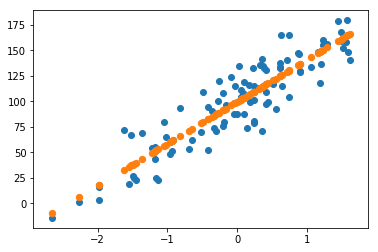

In [221]:
plt.scatter(X,y)
plt.scatter(X,yh,s=40)


In [222]:
from sklearn.model_selection import train_test_split



In [223]:
X,y = load_boston(return_X_y=True)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [225]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [226]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [232]:
model.predict(X_test[:10])

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482])

In [228]:
y_test[:10]

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])